In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds=pd.read_csv("https://raw.githubusercontent.com/NithyaPS/Mall_Customer/main/Mall_Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
ds.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
ds.duplicated().sum()

0

In [10]:
ds.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
ds.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
ds.rename(columns={'Genre':'Gender'},inplace=True)

In [13]:
ds.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
ds.drop(columns='CustomerID',axis=1,inplace=True)

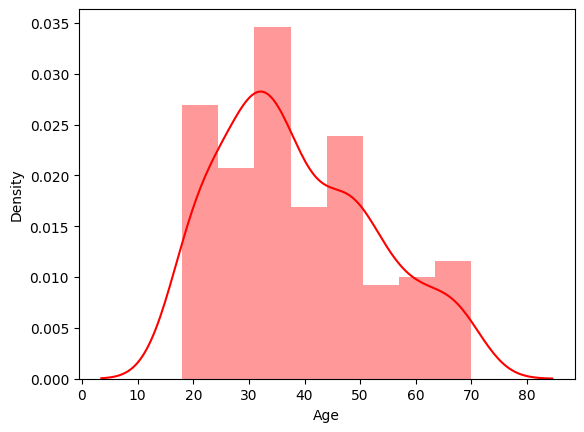

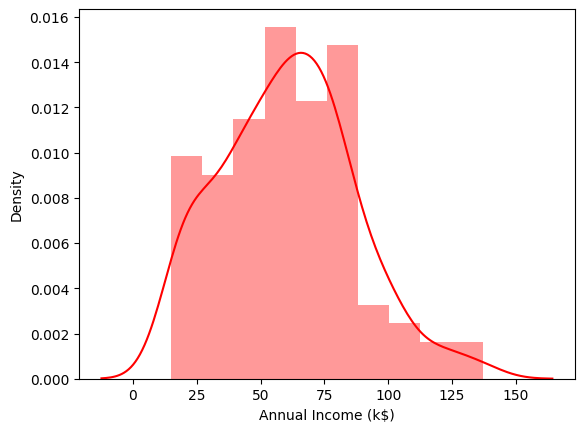

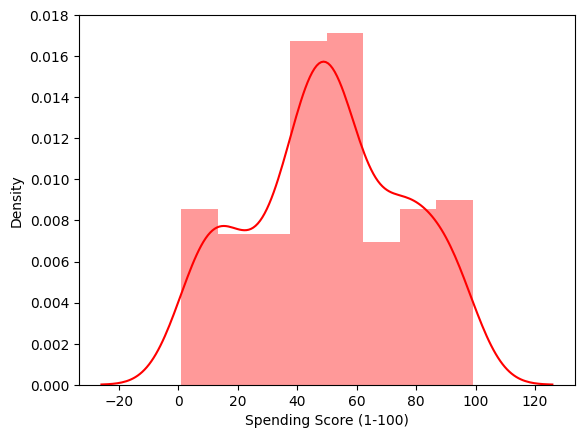

In [15]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for col in columns:
    plt.figure()
    sns.distplot(ds[col],color='Red')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

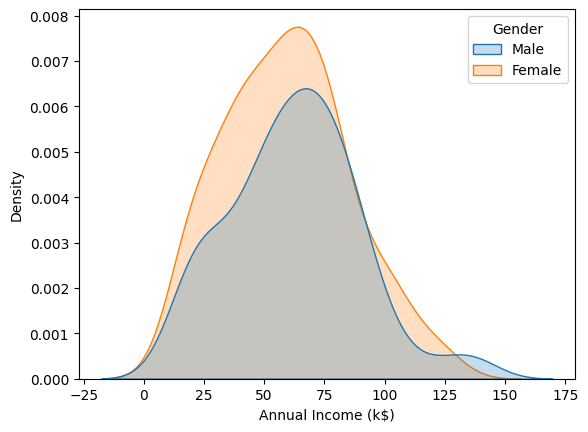

In [16]:
sns.kdeplot(data=ds,x=ds['Annual Income (k$)'],shade=True,hue=ds['Gender'])

<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

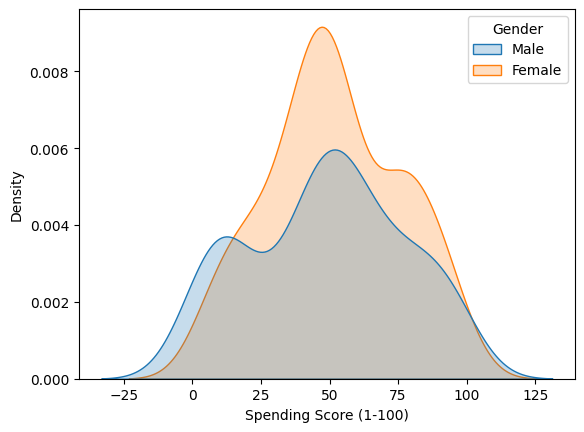

In [17]:
sns.kdeplot(data=ds,x=ds['Spending Score (1-100)'],shade=True,hue=ds['Gender'])

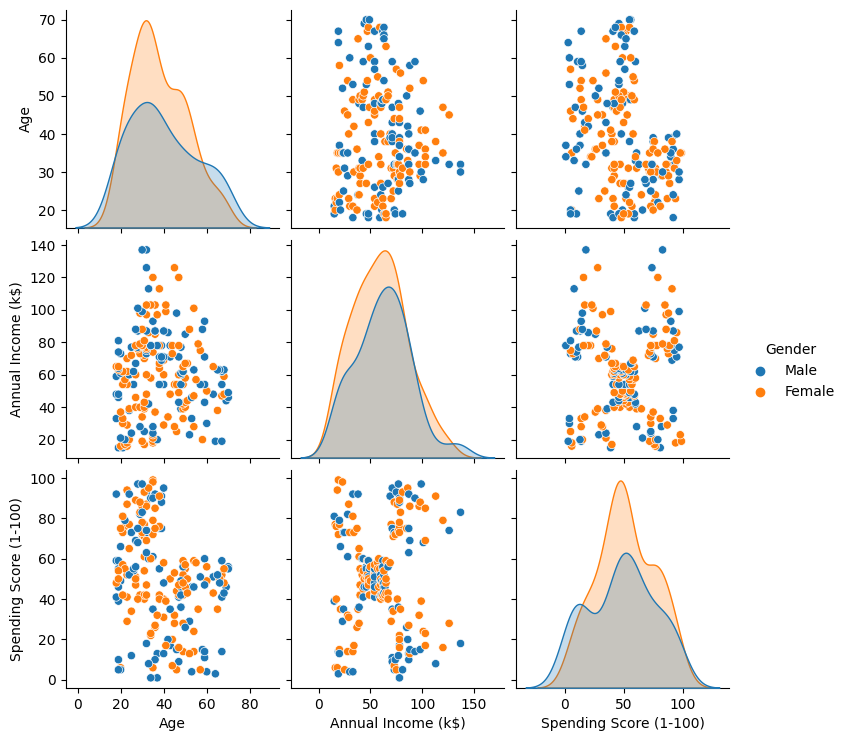

In [18]:
sns.pairplot(ds,hue='Gender')

<AxesSubplot: >

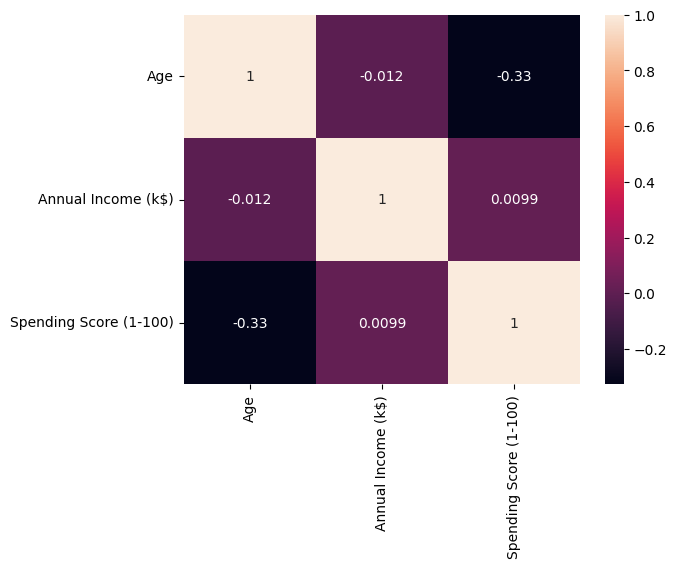

In [19]:
sns.heatmap(ds.corr(),annot=True)

# Bivariate clustering

In [20]:
X=ds.drop(['Gender', 'Age'],axis=1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)

In [22]:
y=kmeans.fit_predict(X)

In [23]:
ds_copy=ds.copy()

In [24]:
ds_copy['Cluster']=y

In [25]:
ds_copy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

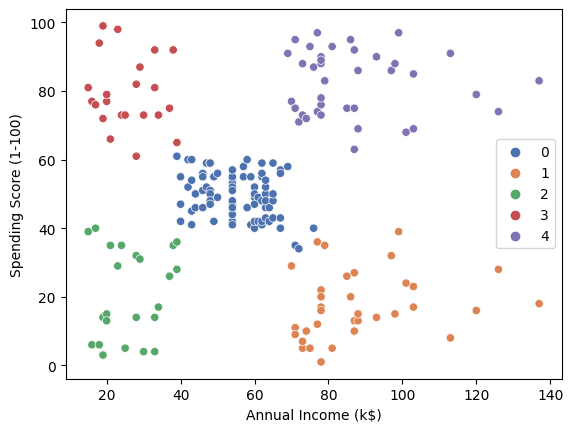

In [26]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,data=ds_copy,palette='deep')

# Heirarchial clustering

In [27]:
X = ds.iloc[:,[2,3]].values

In [28]:
import scipy.cluster.hierarchy as hier

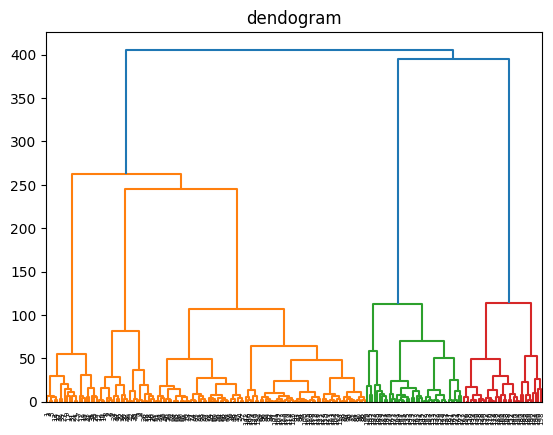

In [29]:
dendrogram = hier.dendrogram(hier.linkage(X,method='ward'))
plt.title('dendogram')
plt.show()

# Agglomerative clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = ac.fit_predict(X)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

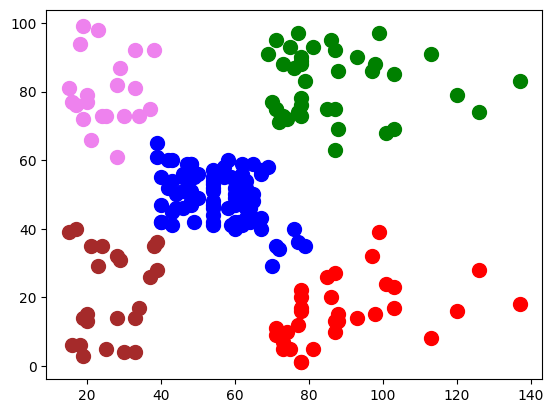

In [31]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label = 'cluster 1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label = 'cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label = 'cluster 3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='violet',label = 'cluster 4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='brown',label = 'cluster 5')